Tabela de iterações e erros:
[[1.00000000e+00 2.42161052e+00]
 [2.00000000e+00 1.17880226e+00]
 [3.00000000e+00 8.36892263e-01]
 [4.00000000e+00 5.80552475e-01]
 [5.00000000e+00 4.10899051e-01]
 [6.00000000e+00 2.90909286e-01]
 [7.00000000e+00 2.05717057e-01]
 [8.00000000e+00 1.45881014e-01]
 [9.00000000e+00 1.03272756e-01]
 [1.00000000e+01 7.32165852e-02]
 [1.10000000e+01 5.18609418e-02]
 [1.20000000e+01 3.67582189e-02]
 [1.30000000e+01 2.60428682e-02]
 [1.40000000e+01 1.84563349e-02]
 [1.50000000e+01 1.30774519e-02]
 [1.60000000e+01 9.26730389e-03]
 [1.70000000e+01 6.56673371e-03]
 [1.80000000e+01 4.65337485e-03]
 [1.90000000e+01 3.29740176e-03]
 [2.00000000e+01 2.33660572e-03]
 [2.10000000e+01 1.65574182e-03]
 [2.20000000e+01 1.17328630e-03]
 [2.30000000e+01 8.31404990e-04]
 [2.40000000e+01 5.89146175e-04]
 [2.50000000e+01 4.17476767e-04]
 [2.60000000e+01 2.95830086e-04]
 [2.70000000e+01 2.09629238e-04]
 [2.80000000e+01 1.48546255e-04]
 [2.90000000e+01 1.05261933e-04]
 [3.00000000e+

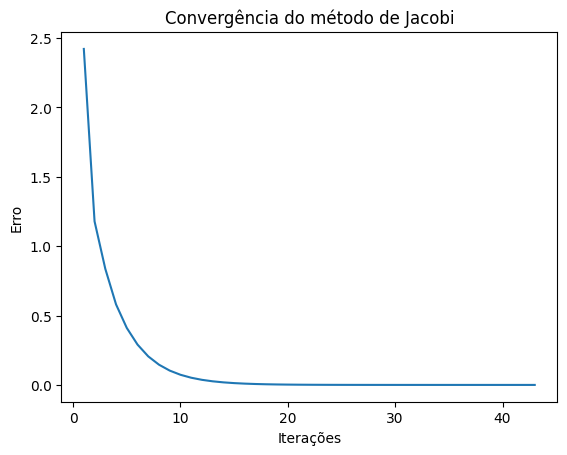

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def matrizes(m):
  match m.upper():
      case 'A':
          a = [[2, 0, 1],[3, 4, -1]]
          b = [1, -1]
          tipo = 2
          return a, b, tipo
      case 'B':
          a = [[2, 3, 2],[1, 2, 8]]
          b = [4, -2]
          tipo = 2
          return a, b, tipo
      case 'C':
          a = [[10, 0, 23],[0, 8, 26]]
          b = [2, -3]
          tipo = 2
          return a, b, tipo
      case 'D':
          a = [[8, 1, -1, 8],[1, -7, 2, -4],[2, 1, 9, 12]]
          b = [1, 1, 1]
          tipo = 3
          return a, b, tipo
      case 'E':
          a = [[-3, 1, 1, 2],[2, 5, 1, 5],[1, -1, 3, 14]]
          b = [-1, 2, -2]
          tipo = 3
          return a, b, tipo
      case 'F':
          a = [[6, 3, 1, 10],[4, 9, -3, 16],[1, -1, 3, 14]]
          b = [-2, 5, 7]
          tipo = 3
          return a, b, tipo
      case _:
          raise ValueError("Valor nao encotrado!")



def jacobi(A, b, max_iterations=100, tolerance=1e-6):
    n = len(b)
    x = np.zeros(n)
    x_new = np.zeros(n)

    iterations = []
    errors = []

    for k in range(max_iterations):
        for i in range(n):
            sum_term = 0
            for j in range(n):
                if j != i:
                    sum_term += A[i][j] * x[j]

            x_new[i] = (b[i] - sum_term) / A[i][i]

        error = np.linalg.norm(x - x_new)
        iterations.append(k + 1)
        errors.append(error)

        if error < tolerance:
            break

        x = x_new.copy()

    return x, iterations, errors



num1, num2, tipo = matrizes('f')

A = np.array(num1)

B = np.array(num2)

solution, iterations, errors = jacobi(A, B)

# Plotar tabela de iterações e erros
table = np.column_stack((iterations, errors))
print("Tabela de iterações e erros:")
print(table)
print()

# Imprima a solução

if tipo == 2:
  print("Solução aproximada (̅X) para a matriz 2x2:")
  print(solution)
  print()

  # Calcular a solução dos mínimos quadrados
  solucao_aproximada = np.linalg.lstsq(A, B, rcond=None)[0]

  # Calcular a distância entre a solução aproximada e a solução encontrada pelo método de Jacobi
  distancia = np.linalg.norm(solucao_aproximada - np.append(solution, 0))

  # Imprimir a distância
  print("Distância entre a solução aproximada e a solução encontrada pelo método de Jacobi:", distancia)
  print()

elif tipo == 3:
  print("Solução aproximada (̅X) para a matriz 3x3:")
  print(solution)
  print()

  # Calcular a solução dos mínimos quadrados
  solucao_aproximada = np.linalg.lstsq(A, B, rcond=None)[0]

  # Calcular a distância entre a solução aproximada e a solução encontrada pelo método de Jacobi
  distancia = np.linalg.norm(solucao_aproximada - np.append(solution, 0))

  # Imprimir a distância
  print("Distância entre a solução aproximada e a solução encontrada pelo método de Jacobi:", distancia)
  print()

else:
  raise ValueError("Valor nao encotrado!")


# Plotar gráfico de erros em função das iterações
plt.plot(iterations, errors)
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.title("Convergência do método de Jacobi")
plt.show()
print()